The average change in population after war with Russia post 1990 is -17.80%
The average time spent fighting is 3.43 years


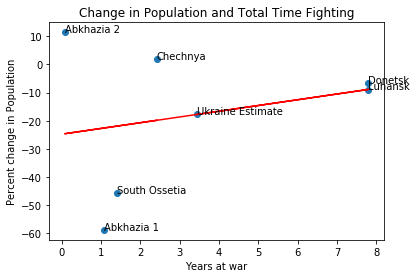

The equation for the Trendline is y = 2.042776x (-24.815926)


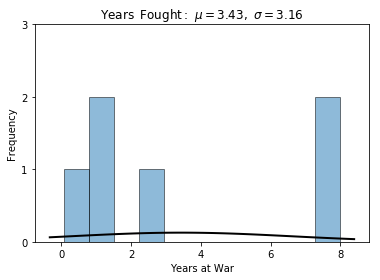

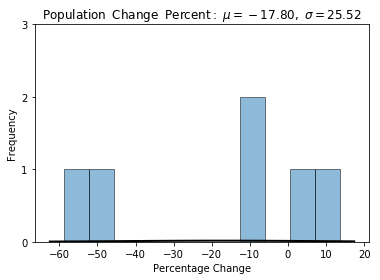

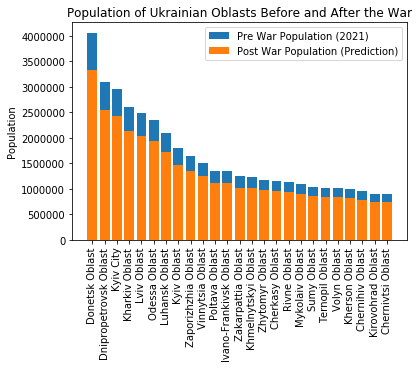

The post war population in Ukraine is expected to be  33872066  With a net change of  -7336040  People


In [73]:
#Let us scrape for pre and post war population shifts in post soviet breakaway conflicts and see if we can predict the outcome
import statistics
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn' the new version of pandas does not like changing df data


chechnya = "https://en.wikipedia.org/wiki/Chechnya" #2 wars one from 1994-1996 other from 1999-2000
south_ossetia = "https://en.wikipedia.org/wiki/South_Ossetia" #1991-1992 and 2008
abkhazia = "https://en.wikipedia.org/wiki/Demographics_of_Abkhazia" #1992-1993
luhansk = {2014 : 2330000 , 2021 : 2121322} #No table scrape needed (demographic table not available, figures from wiki)
donetsk = {2014 : 4387702 , 2021 : 4100280} #See above comment


pop_change={"Chechnya":[], "South Ossetia":[], "Abkhazia 1":[], "Abkhazia 2": [], "Luhansk" :[], "Donetsk":[] } #Dictionary for regions and corresponding population change
years = [2.42, 1.42, 1.08, 0.08, 7.8, 7.8] #Length of each conflict (wikipedia info)
pct = [] #empty list of percent change of population.


#Chechnya Demographics this was a messy wikipedia table so I had to do some excessive cleaning
table_chech = pd.read_html(chechnya, attrs={"class" : "wikitable"})
type(table_chech) #check type of data (not necessary just good programming etiquette in my opinion)
chech_df = table_chech[1] #Wikipedia page had several tables under same class, have to slice to get the one about demographics
new_header = chech_df.iloc[0] #grab the first row for the header (changing header because the wikipedia header is shifted down one row)
chech_df = chech_df[1:] #take the data less the header row
chech_df.columns = new_header 
chech_df = chech_df.iloc[1:10,[11,13]] #Pre and post war census data
chech_df.columns.values[0] = "1989"
chech_df.columns.values[1] = "2002"
chech_df.reset_index(drop=True, inplace=True) #resetting indices
chech_df = chech_df.apply(pd.to_numeric) #make the data numeric instead of objects
chech_df['1989'] = chech_df.iloc[:,0].sum(axis = 0) #axis = 0 adds vertically, 1 horizontally
chech_df['2002'] = chech_df.iloc[:,1].sum(axis = 0) #axis = 0 adds vertically, 1 horizontally
chech_df = chech_df.iloc[[0],:] 

#Find % change of chechnyan population after the war
post_chech = chech_df.iloc[0,1] #slicing for column that is post war (2002)
pre_chech = chech_df.iloc[0,0] #slicing for pre war column (1989)
chge_chech = post_chech - pre_chech #change of total population before and after the war
pct_chech = (chge_chech/pre_chech)*100 #percent change
pct.append(pct_chech) #add to the list




#South Ossetia Demographics (data is from before the first war and after the second war)
table_so = pd.read_html(south_ossetia, attrs={"class" : "wikitable"}) #Cleaner table, less reworking. Comments from Chechnya data frame apply to this.
type(table_so) #get type
so_df = table_so[0]
new_header = so_df.iloc[0] #grab the first row for the header rename due to data shift during import
so_df = so_df[1:] #take the data less the header row
so_df.columns = new_header 
so_df = so_df.iloc[:,6:]
so_df=so_df.dropna(how="all")
so_df=so_df.iloc[[6],:]
so_df.reset_index(drop=True, inplace=True)
so_df = so_df.apply(pd.to_numeric) #make data numeric

#find % change of South Osettia after the war
post_so = so_df.iloc[0,1] #post war data (2015)
pre_so = so_df.iloc[0,0] #Pre war data (1989)
chge_so = post_so - pre_so #Total population change
pct_so = (chge_so/pre_so)*100 #percentage change
pct.append(pct_so) #Append percentage change to the percentage list


#Abkhazia Demographics (data before and after both wars therefore I am going to break this down into two dataframes)

table_abz = pd.read_html(abkhazia, attrs={"class" : "wikitable"})
type(table_abz)
abz_df = table_abz[1]
new_header = abz_df.iloc[0] #grab the first row for the header
abz_df = abz_df[1:] #take the data less the header row
abz_df.columns = new_header


k = [] #List to add census year to

#The table is set up differently. Former data the Years are column headers, Here they are the first row. 
#looking back I think pandas has a function that can convert a row to a column

for i in abz_df.iloc[:,0]:# in order to convert data to numeric we need to get rid of strings in census title
    if len(i) > 4: #Years are four character strings so we want to slice the rest of the string to just get the number
        i = i[slice(4)] 
        k.append(int(i))
        
abz_df['Year'] = k #Applying the new list to convert the long string to just the year


#First war (1992-1993)

abz_df1 = abz_df.iloc[[7,8],[0,6]]
abz_df1 = abz_df1.apply(pd.to_numeric)
abz_df1.reset_index(drop=True, inplace=True)
pre_abz1 = abz_df1.iloc[0,1]
post_abz1 = abz_df1.iloc[1,1]
chge_abz1 = post_abz1 - pre_abz1
pct_abz1= (chge_abz1/pre_abz1)*100

pct.append(pct_abz1)

#Second War 2008

abz_df2 = abz_df.iloc[[8,9],[0,6]]
abz_df2 = abz_df2.apply(pd.to_numeric)
abz_df2.reset_index(drop=True, inplace=True)
pre_abz2 = abz_df2.iloc[0,1]
post_abz2 = abz_df2.iloc[1,1]
chge_abz2 = post_abz2 - pre_abz2
pct_abz2 = (chge_abz2/pre_abz2)*100

pct.append(pct_abz2)


#Luhansk


#No data importanting because tables weren't readily available
lpr=[]

for key in luhansk:
    lpr.append(luhansk[key]) #adding to list instead of hardcoding dictionary values to variables for more dynamic code if change is needed

pre_lpr = lpr[0]
post_lpr = lpr[1]
chge_lpr = post_lpr - pre_lpr
pct_lpr = (chge_lpr/pre_lpr)*100

pct.append(pct_lpr)


#Donetsk

#Same comments as Luhansk

dpr = []

for key in donetsk:
    dpr.append(donetsk[key])

pre_dpr = dpr[0]
post_dpr = dpr[1]
chge_dpr = post_dpr - pre_dpr
pct_dpr = (chge_dpr/pre_dpr)*100

pct.append(pct_dpr)


#Loop to add the population change to dictionary that already has the keys named after regions of fighting, 

#I added to the percent change list (pct) in the same order that the dictionary is set up to easily match keys and values

i = 0
while i < len(pop_change): #no hardcoding!
    for key in pop_change:
        pop_change[key] = pct[i]
        i = i+1

avg_change = statistics.mean(pct) #Average % increase or decrease
avg_years = statistics.mean(years) #Average number of years at war

pop_change["Ukraine Estimate"] = avg_change # adding a new key to the dictionary corresponding to average change in population
pct.append(avg_change) #Adding the average values to the lists to be able to plot the predicition of ukraine
years.append(avg_years)



print("The average change in population after war with Russia post 1990 is " + "%.2f"%avg_change + "%")
print("The average time spent fighting is " + "%.2f"%avg_years + " years")
    

# Graphing the data
plt.scatter(years,pct) #Scatter to check if there's a correlation between time at war and change in population


 #calc the trendline
z = np.polyfit(years, pct, 1) #Trendline fitting for both parameters (years fought and percent population change)
p = np.poly1d(z) #linear fit
plt.plot(years,p(years), "r")





annotations = [] #Initiating a list here to add titles to the scatter dots

for key in pop_change: #We want to title the dictionary key (Name of country) with its corresponding percent change
    annotations.append(key)

for i, label in enumerate(annotations): #getting the Key to assign to value 
    plt.annotate(label, (years[i], pct[i])) #adding the key to its corresponding point on the graph


plt.title("Change in Population and Total Time Fighting")
plt.ylabel("Percent change in Population")
plt.xlabel("Years at war")
plt.show()
print("The equation for the Trendline is " + "y = %.6fx (%.6f)"%(z[0],z[1]))


#Histogram for Years fought

data = years[0:-1] #Last year is the predicted average for Ukraine. Not useful for this calculation

y_lim = [0,1,2,3]

mu, std = norm.fit(data) #parameters and normal fitting to histogram to interpret the data
bins = np.linspace(0.8*np.min(data),8,2*len(data))

plt.hist(data, bins, alpha=0.5, histtype='bar', ec='black') #Histogram of data

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

#plt.hist(pop, bins, alpha=0.5, histtype='bar', ec='black')
plt.plot(x, p, 'k', linewidth=2) #plot the model
plt.yticks(y_lim)
plt.title(r'$\mathrm{Years\;\; Fought:}\ \mu=%.2f,\ \sigma=%.2f$' %(mu, std)) # Return mu (average) and sigma (standard deviation)
plt.xlabel("Years at War")
plt.ylabel("Frequency")
plt.show()



#Histogram For Population change annotations are the same as above histogram

data2 = pct[0:-1] #percent change, last list item is the average, not useful for this calculation
y_lim = [0,1,2,3] #frequency does not exceed 2 times (small sample size)

mu, std = norm.fit(data2)
bins = np.linspace(np.min(data2),1.2*np.max(data2),2*len(data2))

plt.hist(data2, bins, alpha=0.5, histtype='bar', ec='black')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

#plt.hist(pop, bins, alpha=0.5, histtype='bar', ec='black')
plt.plot(x, p, 'k', linewidth=2)
plt.yticks(y_lim)
plt.title(r'$\mathrm{Population\;\; Change \;\; Percent:}\ \mu=%.2f,\ \sigma=%.2f$' %(mu, std))
plt.xlabel("Percentage Change")
plt.ylabel("Frequency")
plt.show()


#Barplot of Ukrainian Oblast's New Population after the war using the data we accumulated from other wars

wiki1 = "https://en.wikipedia.org/wiki/Demographics_of_Ukraine"

tables = pd.read_html(wiki1, attrs={"class" : "wikitable sortable"})

type(tables)

df3 = tables[3] #finding the table in the corresponding class

new_header = df3.iloc[0] #grab the first row for the header
df3 = df3[1:] #take the data less the header row
df3.columns = new_header 


df3.columns = [c.replace(' ', '_') for c in df3.columns]

df4=df3.iloc[0:25,:] #Deleting Total Ukraine Population because we want to see Oblasts


pop = [] #population of oblasts

for i in df4.iloc[:,1]:
    pop.append(int(i))
    
labels = [pop]
plt.bar(df4.Name_of_Oblast,pop, label = "Pre War Population (2021)")
plt.xticks(rotation="vertical")
plt.yticks
plt.ylabel("Population")




#Graph post war population of each oblast 


new_pop = [i - (i*(-1*avg_change/100)) for i in pop] #List comprehension of predicted population after the war
new_pop = list( map(int, new_pop) ) #assigning the new population an integer data type because you cannot have 100000.67938 people

plt.bar(df4.Name_of_Oblast,new_pop, label = "Post War Population (Prediction)")
plt.xticks(rotation="vertical")
plt.yticks
plt.title("Population of Ukrainian Oblasts Before and After the War")
plt.ylabel("Population")
plt.legend(loc="upper right")
plt.show()

pop_Ukraine= int(df3.iloc[25,1]) 
pop_Ukraine = pop_Ukraine + (sum(new_pop) - sum(pop))


print("The post war population in Ukraine is expected to be " , pop_Ukraine, " With a net change of ", sum(new_pop) - sum(pop), " People")

